<h1 style="background-color:#C2B4B9;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Bird Species Classification Using Convolutional Neural Networks </centre></strong></h1>
<img src="../images/logo_part1.jpg">

<h2 style="background-color:#C2B4B9;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Methodology: Model Architecture </centre></strong></h2>

#### 03.Model Development
##### Convolutional Neural Networks (CNN) for Bird Species Classification
**Objective:** Train a custom CNN model on the preprocessed dataset.

**Model Training:** <br>
<br>
 - **Base Model:**
    + Defines the CNN architecture using Keras layers such as Conv2D, MaxPooling2D, Flatten, Dense, and Dropout.
    + Compiles the model with the Adam optimizer and categorical cross-entropy loss.
 
 - **Training and Evaluation:**
    + Utilizes EarlyStopping and ModelCheckpoint callbacks for efficient training.
    + Trains the model and evaluates its performance on the validation set.
    + Includes code to visualize training and validation accuracy over epochs.

---

#### Import Libraries and Load Data:

In [4]:
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, ZeroPadding2D
from tensorflow.keras.models import Sequential

from scripts.data_preprocessing import create_data_generators

data_dir = '../dataset/raw/CUB_200_2011/images/'
processed_dir = '../dataset/processed/images/'

#### Define Model Architecture:

In [8]:
train_generator, validation_generator = create_data_generators(processed_dir+'training')

model_1 = Sequential([
    
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(25, activation='softmax')
])

model_1.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

model_1.summary()

Found 954 images belonging to 25 classes.
Found 222 images belonging to 25 classes.
Classes found: {'007.Parakeet_Auklet': 0, '012.Yellow_headed_Blackbird': 1, '014.Indigo_Bunting': 2, '017.Cardinal': 3, '018.Spotted_Catbird': 4, '025.Pelagic_Cormorant': 5, '035.Purple_Finch': 6, '040.Olive_sided_Flycatcher': 7, '044.Frigatebird': 8, '054.Blue_Grosbeak': 9, '056.Pine_Grosbeak': 10, '060.Glaucous_winged_Gull': 11, '061.Heermann_Gull': 12, '075.Green_Jay': 13, '079.Belted_Kingfisher': 14, '088.Western_Meadowlark': 15, '095.Baltimore_Oriole': 16, '097.Orchard_Oriole': 17, '109.American_Redstart': 18, '123.Henslow_Sparrow': 19, '128.Seaside_Sparrow': 20, '143.Caspian_Tern': 21, '145.Elegant_Tern': 22, '158.Bay_breasted_Warbler': 23, '189.Red_bellied_Woodpecker': 24}
Number of classes in training generator: 25
Number of classes in validation generator: 25


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 25)             │        12,825 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,408,921 (169.41 MB)

 Trainable params: 44,408,921 (169.41 MB)

 Non-trainable params: 0 (0.00 B)

#### Train Model:

In [33]:
history_1 = model_1.fit(
    train_generator, 
    epochs=20, 
    validation_data=validation_generator
)

loss, accuracy= model_1.evaluate(validation_generator)

print(f'Loss: {loss}, Accuracy: {accuracy}')

model_1.save('../models/custom_cnn/bird_species_model_1.keras')

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 29s 872ms/step - accuracy: 0.1022 - loss: 5.0061 - val_accuracy: 0.0901 - val_loss: 3.1226
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 28s 934ms/step - accuracy: 0.1066 - loss: 3.0699 - val_accuracy: 0.1171 - val_loss: 3.0597
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 900ms/step - accuracy: 0.2391 - loss: 2.8007 - val_accuracy: 0.1667 - val_loss: 2.9219
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 869ms/step - accuracy: 0.3892 - loss: 2.3637 - val_accuracy: 0.1667 - val_loss: 3.0580
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 861ms/step - accuracy: 0.5809 - loss: 1.6777 - val_accuracy: 0.1486 - val_loss: 3.6207
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 864ms/step - accuracy: 0.6968 - loss: 1.0946 - val_accuracy: 0.1441 - val_loss: 4.3808
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 846ms/step - accuracy: 0.8638 - loss: 0.5798 - val_accuracy: 0.1532 - val_loss: 5.3482
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 829ms/step - accuracy: 0.9365 - loss: 0.3014 - val_accu

Loss: 8.05497932434082, Accuracy: 0.10810811072587967


#### Plot Training History:

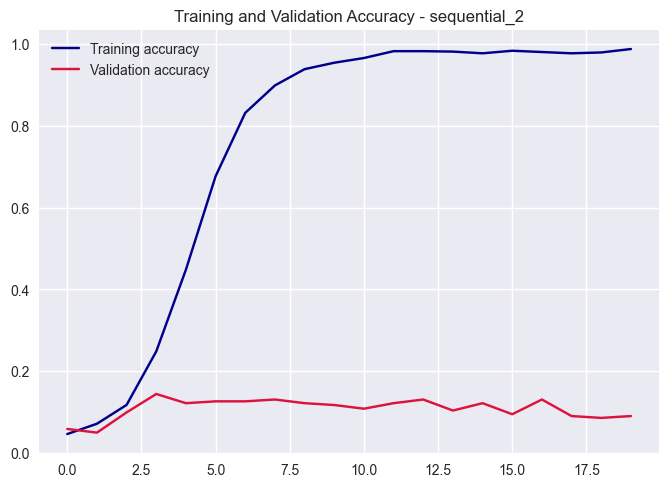

<Figure size 800x550 with 0 Axes>

In [31]:
plt.style.use('seaborn-v0_8')

# Nome do modelo de treino
model_name = history_1.model.name

acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'darkblue', label='Training accuracy')
plt.plot(epochs, val_acc, 'crimson', label='Validation accuracy')
plt.title(f'Training and Validation Accuracy - {model_name}', fontsize=12)
plt.legend(loc=0)
plt.figure()

plt.show()
